In [1]:
import seaborn
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-1769 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442079051.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 324233 observations with 31301 users and 109 items.
PROGRESS:     Data prepared in: 0.141633s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 2        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations           

In [7]:
athlete_ratings, segment_ratings, model = cm.df_to_latent_features(training_df, 4)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 324233 observations with 31301 users and 109 items.
PROGRESS:     Data prepared in: 0.136394s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 4        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations           

In [6]:
vm.testing_rmse(model, testing_df)

0.5397910362117665

In [3]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,rating_1,rating_2,rating_3,rating_4
seg_average_grade,-0.069295,0.818405,0.517558,-0.041101
seg_distance,0.000837,0.150898,0.258049,-0.020753
seg_maximum_grade,-0.016267,0.184596,0.078042,-0.059986
rating_1,1.000000,-0.029206,-0.226778,-0.153156
rating_2,-0.029206,1.000000,0.539484,0.083799
rating_3,-0.226778,0.539484,1.000000,-0.098672
rating_4,-0.153156,0.083799,-0.098672,1.000000


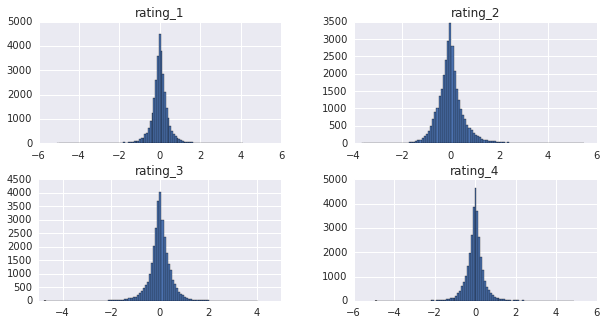

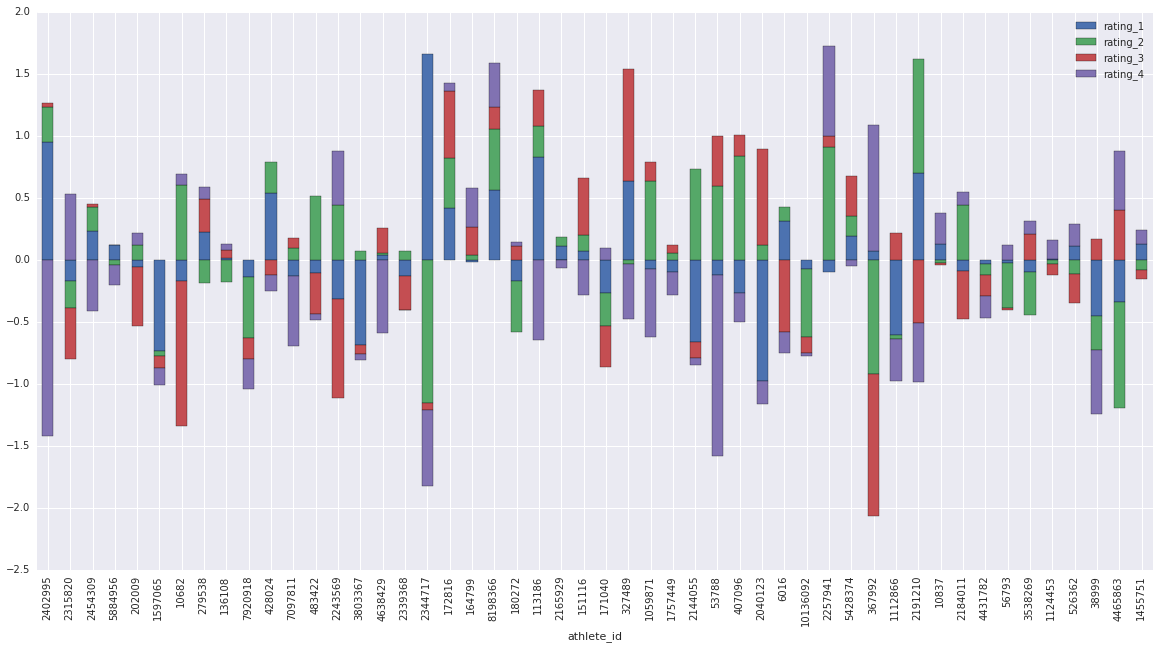

In [4]:
vm.plot_ratings(athlete_ratings)

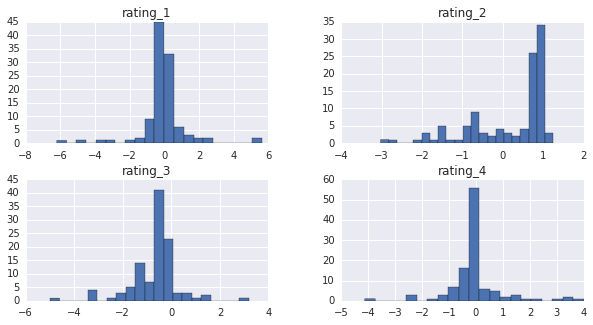

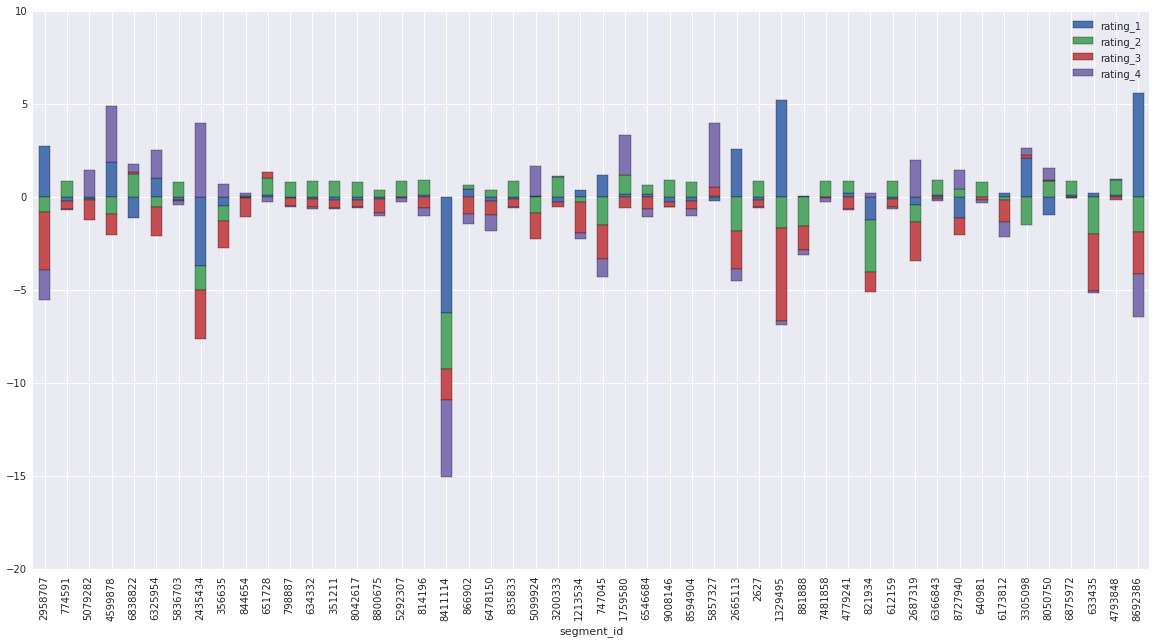

In [5]:
vm.plot_ratings(segment_ratings)

In [45]:
leader_boards = r.get_all_leader_boards(athlete_ratings)
leader_boards

[      athlete_id    rating_1
 rank                        
 1        2861297  100.000000
 2           8050   97.366227
 3        9341190   93.793383
 4        2022027   88.336728
 5          77135   88.331971
 6        2302926   88.197382
 7         188765   87.112166
 8         195917   87.070871
 9         190140   86.115809
 10        462886   85.594465
 11        169105   84.871578
 12        221818   84.269825
 13       1913421   84.049742
 14       4518926   83.898164
 15        333349   83.781431
 16       1852667   83.542039
 17           539   83.538278
 18        197881   83.411363
 19       1922403   83.364853
 20       1111441   83.054272,       athlete_id    rating_2
 rank                        
 1        5436512  100.000000
 2        4717107   99.011187
 3         791129   93.384932
 4         184064   88.743592
 5         167745   87.414211
 6         571270   87.059912
 7        2478759   86.810466
 8        5961136   86.654691
 9           9145   86.573087
 10       

In [41]:
scaled_segment_ratings = r.get_scaled_ratings(segment_ratings)
scaled_segment_ratings.ix[4062646]